In [1]:
import os
import fnmatch
import pandas as pd
from os.path import isfile, join
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# Total Charge evolution

In [2]:
data_directory =  "/media/Carol/Magnetic/Experiments/Colloidal_Ice/Cairo_lattice/preAnalysis_17-05-2022/vertices"

In [3]:
Cairo = []
for file in os.listdir(data_directory):
    if fnmatch.fnmatch(file, "vertices_h=2_w=2_Exp*.dat"):
        print(file)
        Cairo.append(pd.read_csv(join(data_directory,file), sep = "\t", index_col = [0,1])) 
        
keys_Cairo = []
for i in range(len(Cairo)):
    keys_Cairo.append(i)

vertices_h=2_w=2_Exp21.dat
vertices_h=2_w=2_Exp2.dat
vertices_h=2_w=2_Exp8.dat
vertices_h=2_w=2_Exp5.dat
vertices_h=2_w=2_Exp4.dat
vertices_h=2_w=2_Exp23.dat
vertices_h=2_w=2_Exp24.dat
vertices_h=2_w=2_Exp31.dat
vertices_h=2_w=2_Exp10.dat
vertices_h=2_w=2_Exp7.dat
vertices_h=2_w=2_Exp14.dat
vertices_h=2_w=2_Exp26.dat
vertices_h=2_w=2_Exp28.dat
vertices_h=2_w=2_Exp20.dat
vertices_h=2_w=2_Exp29.dat
vertices_h=2_w=2_Exp30.dat
vertices_h=2_w=2_Exp11.dat
vertices_h=2_w=2_Exp25.dat
vertices_h=2_w=2_Exp6.dat
vertices_h=2_w=2_Exp19.dat
vertices_h=2_w=2_Exp17.dat
vertices_h=2_w=2_Exp9.dat
vertices_h=2_w=2_Exp22.dat
vertices_h=2_w=2_Exp16.dat
vertices_h=2_w=2_Exp18.dat
vertices_h=2_w=2_Exp27.dat
vertices_h=2_w=2_Exp1.dat
vertices_h=2_w=2_Exp0.dat
vertices_h=2_w=2_Exp3.dat
vertices_h=2_w=2_Exp12.dat
vertices_h=2_w=2_Exp15.dat


In [4]:
Cairo_exp = pd.concat(Cairo, keys = keys_Cairo)
Cairo_exp.index.names = ['Exp', 'frame', 'id']
Cairo_exp = Cairo_exp.query('coordination != 2')


(177.66494975561886, 790.0711415555263, 180.10684358020103, 790.9721809687384)

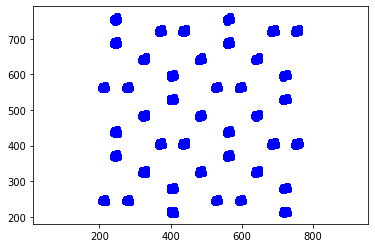

In [5]:
plt.plot(Cairo_exp.x,Cairo_exp.y, 'o', c= 'blue' )
plt.axis('equal')

## First method

As far as the analyzed system has 2 3-coordination vertices for each 4-oordination vertex we need to preserve this proportion in order to reproduce data from simulations. To do that, we can only made the analysis of 3 vertices (two 3-coordination and one 4-coordination). But we will loose a lot of data doing that. Instead we propose to weight each vertex. Vertices at the corners will have a weight of 1/4 (Only one particle inside the structure). At the edges 1/2 and inside the boundaries 1.

In [6]:
Cairo_exp['weigth'] = 1

In [7]:
Cairo_exp.loc[(Cairo_exp['x'] < 100) & (Cairo_exp['y'] < 300) & (Cairo_exp['y'] > 140) , 'weigth'] = 1/2
Cairo_exp.loc[(Cairo_exp['x'] > 305) & (Cairo_exp['y'] < 300) & (Cairo_exp['y'] > 140) , 'weigth'] = 1/2

Cairo_exp.loc[(Cairo_exp['y'] > 300) & (Cairo_exp['x'] > 100) & (Cairo_exp['x'] < 300) , 'weigth'] = 1/2
Cairo_exp.loc[(Cairo_exp['y'] < 100) & (Cairo_exp['x'] > 100) & (Cairo_exp['y'] < 300) , 'weigth'] = 1/2

Cairo_exp.loc[(Cairo_exp['x'] < 100) & (Cairo_exp['y'] > 300)  , 'weigth'] = 1/4
Cairo_exp.loc[(Cairo_exp['x'] < 100) & (Cairo_exp['y'] < 100)  , 'weigth'] = 1/4
Cairo_exp.loc[(Cairo_exp['x'] > 300) & (Cairo_exp['y'] < 100)  , 'weigth'] = 1/4
Cairo_exp.loc[(Cairo_exp['x'] > 300) & (Cairo_exp['y'] > 300)  , 'weigth'] = 1/4

In [8]:
edges = Cairo_exp.query('weigth == 1/2')
corners = Cairo_exp.query('weigth == 1/4')
bulk =  Cairo_exp.query('weigth == 1')

(177.66494975561886, 790.0711415555263, 180.10684358020103, 790.9721809687384)

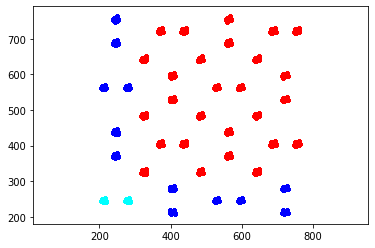

In [9]:
plt.plot(edges.x, edges.y ,'.', color = 'blue')
plt.plot(corners.x, corners.y ,'.', color = 'red')
plt.plot(bulk.x, bulk.y ,'.', color = 'cyan')
plt.axis('equal')

## Second method

In [10]:
#Ca = Cairo_exp.query('x < 290 and x > 120') # 4 pentagons
#C = Ca.query('y > 130 and y < 265')

# Ca = Cairo_exp.query('x < 305 and x > 0')
# C = Ca.query('y > 90 and y < 400')

C = Cairo_exp

(177.66494975561886, 790.0711415555263, 180.10684358020103, 790.9721809687384)

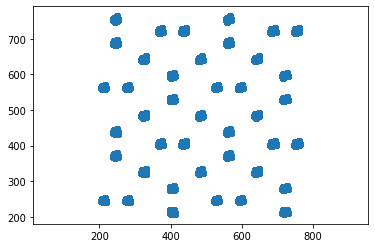

In [11]:
plt.plot(C.x, C.y, 'o')
plt.axis('equal')

In [12]:
def magnetic_field_value(time):
    
    m = 6.82628571 
    b = 0.55685714
    slope = 4/600 # 4V in 600s
    
    magnetic_field_value = (m*(time*slope)+b)
    
    return magnetic_field_value # in mT

C['mT'] = magnetic_field_value(C.index.get_level_values('frame')/30)

In [13]:
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["blue", 
                                                    "red"])

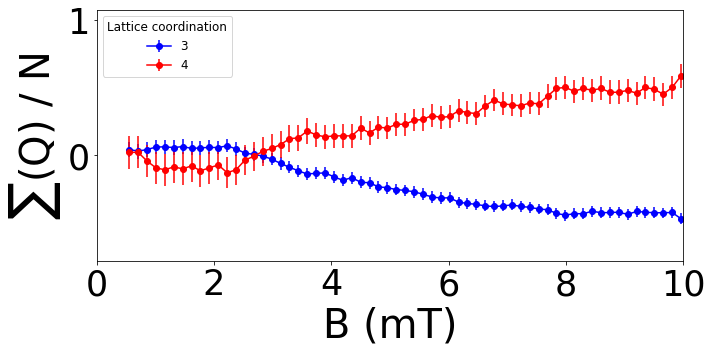

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))

Sep_charge_tot = C.groupby(['frame','coordination']).sum()

Sep_charge = C.groupby(['frame','coordination']).sum()/C.groupby(['frame','coordination']).count()

Sep_charge['err'] = (C.groupby(['frame','coordination'])['charge'].std())/np.sqrt(C.groupby(['frame','coordination'])['charge'].count())

for typ_m, mtype in Sep_charge.groupby('coordination'):
    
    ax.errorbar(mtype['mT'], mtype['charge'],yerr = mtype['err'],fmt = '-o', label = typ_m)
    


    
ax.tick_params(axis='y', labelsize=35)
ax.tick_params(axis='x', labelsize=35) 
ax.legend(fontsize = 12, title= 'Lattice coordination', title_fontsize = 12, ncol = 1, loc = 'upper left')
ax.set_xlim(0,10)


ax.set_xlabel('B (mT)', size = 40)
ax.set_ylabel('$\sum$(Q) / N', size = 40)




plt.tight_layout()

In [21]:
del Sep_charge['x']
del Sep_charge['y']
del Sep_charge['dx']
del Sep_charge['dy']
del Sep_charge['weigth']



In [22]:
Sep_charge = Sep_charge.query('mT < 10')
Sep_charge.to_csv('Experimental_Charge_evolution.dat', sep='\t')

In [23]:
Sep_charge

charge        mT       err
frame coordination                              
0     3             0.042339  0.556857  0.055152
      4             0.021505  0.556857  0.121228
100   3             0.030242  0.708552  0.055012
      4             0.021505  0.708552  0.117776
200   3             0.042339  0.860248  0.054259
...                      ...       ...       ...
6000  4             0.451613  9.658571  0.083986
6100  3            -0.423387  9.810267  0.038672
      4             0.501792  9.810267  0.087494
6200  3            -0.469758  9.961962  0.038972
      4             0.587814  9.961962  0.089666

[126 rows x 3 columns]